# <span style="color: #666666">Creating User Accounts on your Domain Server</span>

<table width="100%">
    <tr>
        <td align="left">
            📚 <a href="../00-quickstart.ipynb">quickstart</a> / data-owner / 02-create-account-configure-pb.ipynb
        </td>
        <td align="right">
            🧙‍♂️ <a href="../01-install-wizard.ipynb">Install Wizard</a>
        </td>
    </tr>
</table>

#### <span style="color: #666666">Data Owner Tutorials</span>

☑️ <a href="00-deploy-domain.ipynb">00-deploy-domain </a><br />
☑️ <a href="01-upload-data.ipynb">01-upload-data </a><br />
◻️ 02-create-account👈

#### <span style="color: #666666"> 🚨 Pre-Requisites Steps</span>

##### <span style="color: #666666"><a href="01-upload-data.ipynb" name="step4" style="color: #666666">1. Annotate your dataset with the appropriate DP metadata</a></span>
##### <span style="color: #666666"><a href="01-upload-data.ipynb" name="step5" style="color: #666666">2. Upload your dataset to Domain Server</a></span>

##### <span style="color: #666666"><b>Note:</b> The above prerequisite steps are covered in the previous tutorial: <a href="01-upload-data.ipynb">How to upload private data to the Domain Node</a>. Please execute those steps before implementing this tutorial.</span>

#### <span style="color: #666666"> 📒 Overview of this tutorial</span>
##### <span style="color: #666666">Domain Owners can directly `create` user accounts for Data Scientists to use their domain nodes. When the domain owner creates a new user account, by default that user will have the lowest level of permissions to access that data (means data is highly private) and will be assigned `0` Privacy Budget. The steps covered in this tutorial are:</span>
##### <span style="color: #666666">1. Import Syft & Login to Domain Server</span>
##### <span style="color: #666666">2. Define account credentials</span>
##### <span style="color: #666666">3. Check account permissions</span>

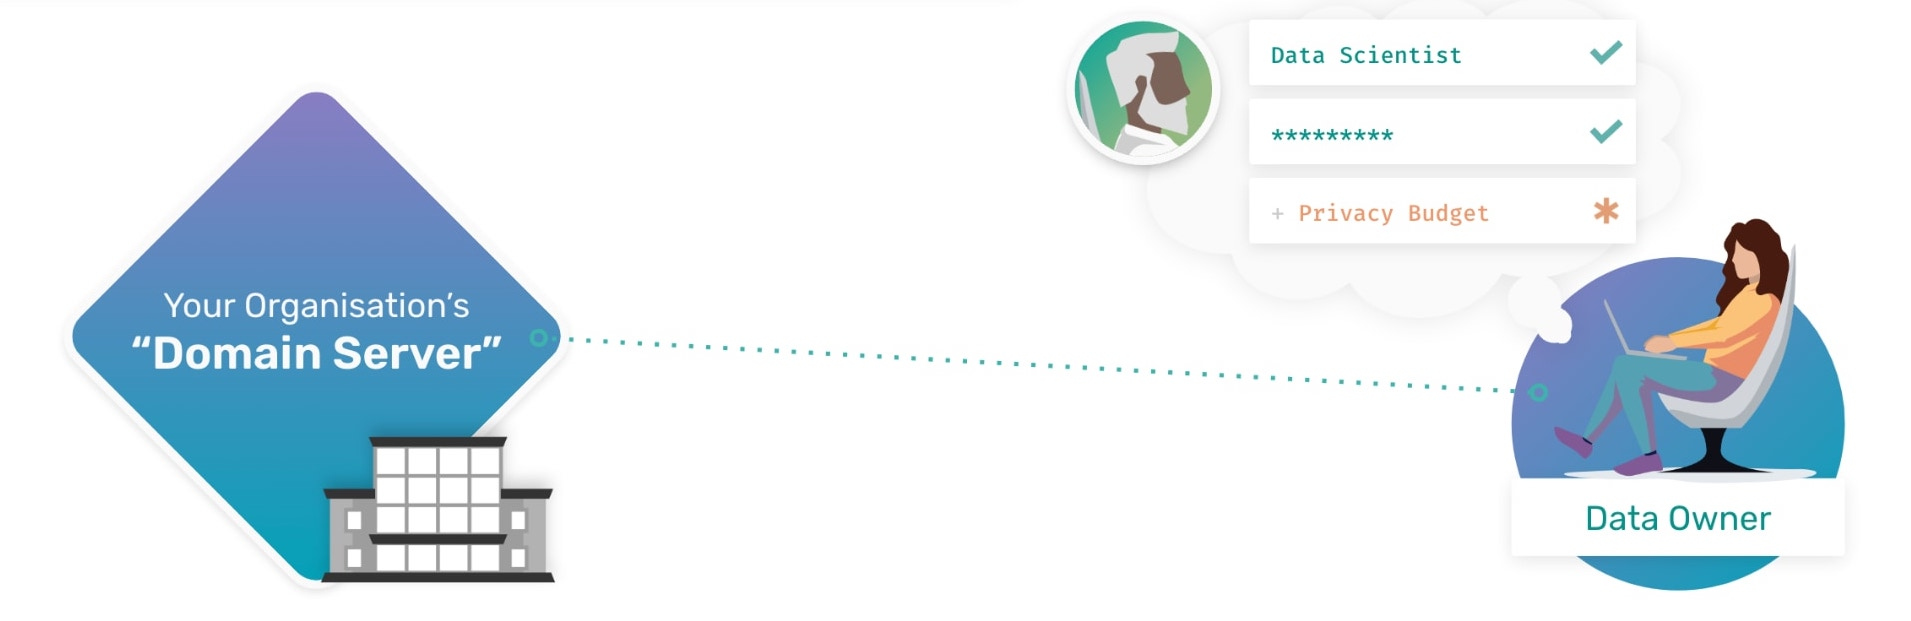

**Note:** If you are using an older version of Syft, please upgrade it to the latest stable release to utilize all the features in this notebook.

In [ ]:
import syft as sy
sy.requires(">=0.8-beta")

In [ ]:
# edit DOMAIN_NAME and run this cell

DOMAIN_NAME = "My Domain"

node = sy.orchestra.launch(name=DOMAIN_NAME, port=8080, dev_mode=True)

<table width="100%" style="box-shadow: 0px 0px 10px -5px #666666;"><tr><td width="38" align="left"><img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAE0AAABNCAYAAADjCemwAAARAklEQVR42u2cBVQb29f2r7u71N31et3d3b1Y3d3de+vu/OtOHUpxL+7uwTVGy/Pt/dFkXWCATDJQWe+s9axAdOaXfbadc/LWyzgAvJOTk/MjgCZ5eXnbnj9/Dhb9LSh+7NmzZ870d3cA1UgfvfWmHwDeJn2sVCpr0IXPJd1Xq9XZJOihZyqVyo9u/6X36ZycnPw5gPfeKGB0Yf/QBe4jRZNySJBQeXQk0e0DssTxAD59nS2rKl2IEV2QHd0qSagIkQWG0GeuJ4uu/TrB+plPmi4gWdcL1fgtshStND5O8/9//JuuAJPouWsBVGHX8CoPwy4MSxdI+fn5MPQgmLrAy6XPWwXgw1fNuj6nkztemmPnC2RQ5XHQ+2qssbRh+5Qe7/SqWFdrOin3kiyKL6YiDxrSpcHLoMcWcRR/Wdb1AZ3EpJKcvPSwJIOXT/dfY99b0cDepQ/fT1JL7a9SZYmwvnkFh1YtxpopY7BywnDsnD8Dt04dQ2J0lOj3LsXqvAE0qihgX9AHHmFaUlmXPCcbPk72OLBiEUy7tcGI5nUxoG4l9K7+A3pX+x79av2MYY1rwrRrG5zZvhGx4aF4LuKzCHRJ4AJIzSoC2D6hE9DXujJSknFh306M/asxulX6Et1//apU9ar6HRYO7QM/d5eCIahWIS48DJ52NnCztkSIrxeU8lxBcGR1QgEigm5/L88heURoOOp7JCfEYcccMwysV4mB6Kwelb/B3AHd8ejyeRxYuQjTe7XHyBb1MKxpLUxu/zsO0n1JcbE6pykMDkBTyZ2+xodJ5b+yM9JxkPwWDz0CIVq9qnyLwQ2q8hAu9lifGj9i07TJiI0IQz5Zo475nS+AGpJB4ygpJTCFXA6Ls8cxtFENEaBEQq32HVZNGAFZbIyYxNgewGdS5WFKqYDxN+9i+QATWjUXD0OkhtNwtbW4zueqK7h80g4eWQZl+kKJqyFHHA2ZWX07lzswTdA4t2sLnuXliUlJnhPMQYYMy2NFgXHE0ufgEw+lyLZ87BD0raHxQ+WsSl9j9eRRyEpPY2sTAy6SuiR19LGyv+nFWVLkYfw6HpILhvThb58vqMI0uGF13L94DmqVUmweZ67PsPSVYljyCblaPYRRx7/4m69QYKwe9JkTWjVDqJ93WWVXUWjZAFrqDI0soz87RSmSV86Xlo4cKMbCpAdX5Rv8u3gOMlNTRJVc9L8DgE90sjJ+shTDkr89p0d3MbRJTelhiBQnv5wMk5cXM0y5uO9QJjTKjodLFS1VCgXM92xDz6rfVthQ7FfzR8rRvhWoIr7GomF9kSJLFBUUiIdFmSkIPdFGqhZPdmYGdi2cWWHWNLD2z9g6ujuM/qkv9DhVHz/hztmTFBRUYqyNQXYsK2IqpcrJ0lOSqLUzosKgLen9D7xPrcOqge3Rk/yYUM06o3dHJMXHifJtZDgnS5yX5A6GrsW4QqlETq6cvpnSg8D0nh0qYFh+hYm/14HVjnlIvHsQeyb3R5/q3wvkbV9hENWrId6eYiNpqGB5BeBjnpfUNWKmpmciPCqGnlcy2JiwkPIvl8iPjWhSFfc2zUSCxX4k3z+Ec/PHYQANReEh+iMCPFxR1iHQKxwsBK0yT+TqCk2WlAIPb3+kpmWU6Bt8XZyoeVijXKFN/bs+bq8zQ/ztfQyMhYdbZmNo/UqCFjmiWR2EB/gBgFhrO1VsKpBITuQQq2ufLC5BBkc3T0RExggGCw7tt08dI98ifeTkYdafLGZ5vzaw37cEiXcOMCyt+L7hDasI1qLrjcdzWaVPtze42DQgNxjF1JjRcfGwd3aHX2AocuWK4g3G+FgsHtFP2gK8yjcEozJmdWqBKyumIuLqLiTdY1CF5XliLcY0K27hXBkEurvxFyoaGi994DUjRf2Zv65RM58UGR0LGwdX+PgHIy09QxsQ+MMSoiKxf9l89Kv9sySw+tX8HvO7/YEDxoPwYMtsgrWb4ZSoSII5o0OzwulI3V9xdscm5KlU0PEoCk0OoN5/oVXjlTg6QyNAHAQe2znByy8IiUnJDIvFaQZWTRzB3VNJgHGasGN8L4Rf3gnZXc0wLF0yiqDrh3UuVOvO6d8VUcGBhsxk5ZOM/tto7C6m789wgsIiYWnjCC+fAMTEJvB95CvSsW/ZPG5hS5bhz+36O54eX8MwROnqSiPyYd9qI+xG04nITEsVXQYWiaCXtevieLGcaGih4Xj4xB5PCVp4ZDS/IbzsbTCofhXJfNigur+w79I4elFyP7Ya41q8qHkrf4Vtc0yRk5UJAAZN/QHo/v+hMVGx0PyDQ3H/sS3cKe0IDo2AQqGgOcn1/K1KZmUzyS8Fnd/KEEQr6tpuLqm077di3DCkJckg9hCAZqaxNFGTvgzNLygUdy1t4ObpC3/6W5YQj7VGYyWzst5UdB+bPpz9kz7QyDr34xoN0f41C3zr5Ha/4andEz53aaCRZekFzeKhNVye+sA3IAQB3l6Y3a+rZNA4tXA6uJwB6KWkewdxf/NMDK5X4F/71vqpIHqq1S8X2q0HVnD28CZowXCwfASjTn9LBm0eBYCIqzv1huZ/bhNWDmjLDUhtMJjRqwMSYyJFWZvAHIlh0G7es4STmye8/YJw7+oljPuniWTQDpsN1dSSeun4zJHoVaQa6VvzJ1w6sBtKufzlQbt+9xEcXDwYGq6eOYmRLetJAqxPje9hsWGG3v6M69CFPf8UDC4TWzdHuL+P4dDoD72gXbvzELZObvDyDcTlUycIWn1JoI1qUg2uh1fqbWW+pzdgwu91BN+7J9WfF/bu5GvU26fpnXIwtKsWD/DE0ZWh4cb58zQ8m0kCzbhVA/id3ag3NMvtczVdDkEtGtGf18Hpa2mmeie3GmhcSjG0BxZ3MaXTP5JAW0wd2NCL2/UCxkN6P9WofWmIl/T+k9q0hJ+rkz7JrS+AX/UuowJCwhgaHtk4wJOqAjtbe8we2EsSaBuHd6Hk9F+9oEVe24WlfVqhZ+WSk+zRvzeAm/Uj0avHictmAwr2fARSFcDQuCpgaG7unlg5dTwvzDO4V7ZhRFeEXtG0fcTJ88Q6TPmj9IA0s3cnRIUEii7YCeJY/VtDBC2YCnaGdtfyCUNjYdfyxZwPGdzvXzGoE+yPrEXgpd2Iub1fZ3hco95cY4L+tYVb3QVJ7s84v2c7VEqlWH8mL7YLhijq3IQkZgiNiGZoXBXAw8uP/RrMDx3g+UWDLW35wA6wPrAajic2wu30Zvid34HI63uRWEYKQnVqQUJbqeRVRDvnTUeaLFGfJmRiUlLSZ3q3u/NJEdRPY2g371vBjUophnb3+g0M4C6H5qT11MI+rWG1fyUcjm9gEbwNcDm5Ce5ntsDp6FpcWTkVdnsX03TdegSYb0bQ/7bw39hnNJDa4CWvSBpGM/2e9rbsq/QJAg5ubm7vlzmxUtoRGRPLeRonuHBx92JosHlsg/E0+9TDwCFq0q4Z7u9cwsCK6eqGWRhU71dy9ASB6lPT1o2pS9uUcrvqdN83pb4vLYYmXxakKaPErutYYPAUXnRsPAGz1FYFDM3Z2Q3zRwwweDJlZNNquLlptiC08yvNKJ3QbzHNgHqV4GL1gNfKifVn6QBq6jRZXJoZx8Yn4gbVnmxtTxyc4UnQ3Dy8sHftCvSq9r1hZVT173B95VDyY8vh87+1cD29Hk4nCqDtNR2umT0XLe7kbpttipzMDLHTd09ELUsoydoSkpK5y8HQYPkiV3tKAeGauTl9o5UNztVWD2yG9LuzobJZjNT7yxB2dRW8zddg16Se1NH9SW8XwPOwPs72YofmXEkWwCSlpMDikTVD0+ZqXiSbx08w5i/Dux2D6/yI26v6Q/VkEfJsF7OgtF6CyEvT8GT7cGwY+hv6VvtWr4maXQtmIjcrS+dV3wCaiVxqJWxtyalpuEPQOILyrSbtcHX1wMz+PSRZnzG9XW1EnDdhYIWkJutLvDkT+6a0xcDa4tfvjv6tIWwtbrBv08XKrgB4V+SiPuH0Iy0jE/esbBgaD1O4e/oyNHh4+mDddCP+Rg23tro/4s6Sfsi1mAuV5UKCVRhc5oO52D2+lWgfx0N76aiBvD2oVF9G1/2c1E7X5aO9y1o+mpmVjQfWdgyNm5Fw8fBmaPD09sehzetpGu8Xg6H1pQ0Upyd0guywGdLOzET25dmQ351XaMiGnJuKRT0aUcNRnI/jeVnz3VsLtb8F1qVZ67w3FMBH9CKr0lZEZmfnwNLWkaHhBqUdjq6eDI2FK2fOYEQLwxuS/Wt/j1sr+kJhuQBKsjQl3Srus+ZrwaltFtEQNsaCLg3QUyS48X83ReBT95KGZQqAqrrwKlrEJ5UUFHJz5bBxcmNouE7BgNd1aKBZPXwE465tS1waNbLeL5jzT10s7dAIS7o2xvQ2tTGi4S80bAoPoTkd67ElFfZpBIlU6D4GGHXJDFtG/Im+1XXP4Xhb5CazSbxiU2iT2Xp9t/hsLmlPJy/qc3R7ytBe5GouWmiudP+yiaOLrbXlds2sv+viplEvhK2fiOQDpsi6PZedPR5vHYrDxu2xtHcTzOlUD1tG/gnXfWMIyEIGo5Nirphh57i/0U9E8rt60mjk5uQUhWbDvl0fZpph6io0TJUqNVw9fQqgkaxoqHLawdD4dv/61YX8Wp+q32BJ20bwXDoK8VunQrbLmHzUnEJWI7daiBSLWUi8MQOZ9+dqHL/O4qGadGsGto35SyeLG9WyAeS5xYDlkf6QfEMZS0XQPH392coYXMESBW9/rbXdvHQRw5rVfmFh32BVp6bwXTEGCduMkLjdCCkHzaB8pLEi6cSgZZSObBv9F/qUkcf5u7sIATMD8E65bF1kBYaEce3J0Cj9sNWmHSwHe0cYd2vLPgwz/6oNl0XDGRYLsp0myDg7s5CVSa24a9OwcdjvVDoJpyM2t64LRcvLAD4s102yHAwsbZ0KEtyH1tq0g+VBANfPMMbwOj/DwqQ3YrdMgRbabhPkXJsrEoT4oRpmboSlvRoX6vFxM8HfzVloL5Qr+7EK2Y6tVKqop2aJWySeONZAY7927uABrOjcHKHk9BmWFtoeE04bJAYlDM7j0FhqG/3KkZkXTfOmWaFIGU5qVOEb/6m/VijtYNk8fIjb87V+TCvZXoL2YEE5Q9MElwV4uGEwts+YgNiIcOk3/osAd5DGv6roCSSnpCIkLBJaa3P3QMDJrQyquKXdFbQ06WW3HDne5jwnUNK+9aYV9it7BG01fahC4JtjcPDxD4KXtx+C715Aws5phaGRT8u+Mqf8gXnsQZ48QwhWPsle0o3+IsB11XR7i0qhUPJyefjbWiJu3/wi1maMtOPToXq8sPz8mcwLaqVcCNhz0g7xG/ylhVeXrOs25zhC8OS5uUhzus+gillbznWKoDYSwnLdCnWsI9QqhRAsViTvT9d/Y7/EB53QbLK8hBJ/iisrHTkej5FCs0eyXWYFCe4hM8jvzTcMnPsu5PmdRV62rCRQLDV9sZdp3rLuW6/aQetu+ScNLUn5Zf3onDwqEGm0XiPlyAwCtxBq2yVlAKLH7ZYWyHkj8hJckafWOPdSlUnWNepV/3nDj1704+xJKFMquvDcTKhzUqBOCSpQcgDUSb4saO/LSoSanbpKJ1AsGQcruVz+a+E9Ta82vM8IXj868Zs0NGL5QipASpIrT4TQUKz5uv/G7bcEcBJdzANSkiZoSKB8Uja9ZwzdnuNo/ib+QPB7vCmLf9CXf9iXLNBXs1pJjOj1MnrtNfrbGEBV0iciOhOvPcSPyOdU4qhGQaQdWeMdntwQkIweGwOgET2vOoCvX8PL/b/j/wFpR1zAtEPEzAAAAABJRU5ErkJggg=="></td><td valign="center"><span style="font-family: sans-serif; font-size:22px; color:#666666">Step 1: Import Syft & Login to Domain Server <sup style="color:#B153BA;"></sup></span></td><td align="right"><img style="padding-right:10px;" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAANAAAAAbCAYAAAANiwEDAAAN8klEQVR42u2cBVRbzfLA89fn7u7a4lbFqQvU3V0+d6VUgCotBKvgEAJEsAru7u7uLrVPOm9mD700BE6hge+lvPScOTR7dye7m/ntSG4uDwBUMgMSFhb344Cg8MUeAUHGyix+gVLDkMjIX1tbW//3dKwb9fyvUHr7b6R7tolPkGSxSHT3pwDwX0/XO/3Go5L/DgiWGHgFiqSeAlGbp0DcrsxCc/QWiFN8hZINQqHw/xVZuzQ5+TteAtEb3gJRkdKuV/G9uoOHjgnu1f/MAEAq8cLNxU2uvxef/CSnsARyi8qUXEohPiUD/EPCuryFofufGsZUBcd9wztQdFkoiXyQnJlLumed5BSWQnRi6hPfIGmDX6BkKXkildFPO0CSoLuxyU/qmlqgsbX9pZCGljZIycoD70BJuW9IyK9fZN0+QeEL/IJD+wpKK0jnrJX65laISUp/4iUQRwkjI38itxE853OWPGe7fhQ/FRBTFwyF6vOKy186wyirqgXfoNBhLz+x/lTXjP/+y1Mg2RsceufL2sZm0jerpaCkAnwCJe2+QWFm8pvhZLeJ52wPPL6dRAXE1AVP8ebCssqXzijKa+rAL0j6wMM3ZN6LAOTlH3JAFH7vy1rO885eKSqrJG/dddNXvFwhgHhXz87FfunorbInkEge356PcoJn/853xtOBfYKf6Z/Bcz6rPm4/vp0P149vl8nj2+qNOw++fRb+PTmBjtVj5rfj3weQCiAVQHz7DdR3ktKDOl8dB6DHMv2c7LZM8F59Y/TtnXAefLvPefyzmuOs7ZRMP4R7egFSAaQCiG+7ecS4xNMLEGfcu2YcIBLyRBs3/o8yA0TJe1VdAxSXV0JpZTXUNjTLXKO26vrGCZPZkooqeDbnKK+uhZyCIqhAGKYbIH19sx8tMDQ0XL58+dcUBaimoYnWzQm9xvWqAEJ5goDYkuD/z7OwSt6wH/Ds7L434wCR8G1fV1aAqEoXIAyBnXv3w7KVa2DlGis48dobkJSaQdeZYR08chwCQ8Tjjk9Ky4A1VhsgICiEvc4vLoXd+w4yXT4BgWSQ1EaQKQwQAaKuZbDlb3PUalevXj9HEYBoXe99+Als2b6Lk70HD8Pla06TnSsdEHRQ0B7OOoC+GEffMXnjPmf01QBkP8xzOvM7ZQQo8m40GJqYwetvvA3BIjF4ennDxi1bYePW7czwK9FI1q7bCJ6+/hNUgsrA5sw5iE9KYa9vefuCxdIVkJGZBfVNzVBZWw97DxwGm3N20wKQmqbeHgSow9LSUlMRgMj4LTdsgl179oGLqzvwXVzh/Q8/hvmLDOGjT20mBQXtCR0UuYXF/wEAOZz92Zg+BMnxmQeIgyRC2QAi7/CJzRnYsm0ndPf0wND9BzD84CFUVdfAxs1bQRwWMQqQjx9k5xVCxN0oyMjJY6Eb6WhCqanFUA11FeP7kT5L7J+bX8iMNDktE1atXQfHTr4GaVk5FOopDUDrNm6GSw5X4cHDRygPmfj5C8DEbAl5Fi5EzcorgMh70ZCSkcXNv7SiGuwuXAZdgwUQFnmXwlwWAmbm5suskbxZNu4F7TWFtrR3FCrfi41nf0kPjSmrrIGo2AS4GxOHpfwaJQTIydZK3rDtdsw8QLI6lQ2gC5cdwBw9RhR+oGQATW0d0NndCx2dnQhHGwNoteV6OHT0BGzbuRvWb9wCJuZL4SrfhTOu5avWgCQ8Ejy8fdk1TR19FhL5BwbBm++8x14vWGyMod0ByC0onhJA8+cv/aGhubnWYlNTbYsVK3QXGZs5/GOu+uCmLduPmJgs0aH2RSYmGjo6Ot98EYDO2J6nNTNp6eiCOwiKobEZg532w/7iFViyfBVs2LQV17kW3v3gY2b4PgiaxbIV8I+5GqhnC/gJhAQYhbMEBLe/ji5usH3XXsohWUi7GHVv27mHjYm4cw/4btfB1GIZC3s3bd0BZkuWw/bde8n7K1yF2zKS7IumCBCN+RLb1jFxtt2Irx1Q2uXypKun/zKTAFGeJfua5mD7A2UK4QqKS2DVGkswWLAYDh49Ds5uNyivYR9+c3snA2jFakvsYwWVVdXQ398Pp06fQeNZSacuO1EXGppAsCQUOrp6wBkNZtOWbdDb14cg9kALQrhp6zb4xPoUDAwOQgvqnCxABMSf/zbntb/+Y+7giAz97Z9qn//5b/+Ev89Rf0yvR9p7tfT0zF8EIPKYdOKTpGfnsnBzM3pkypFoTUamFhAdEwuDQ0OQnZ0DxuidnFzdca3d4INeed5CQ6isrGKHTnJ6JoMhA/U8BejyVScKFRlAHt5+8E81TbhxywN6enuhrbMbHBydGYT+gkAYxP3Jy8un9yCwaPzMA6RAFe7GV1DGTiIPOqbtpjIB1I6GUFtXB77+AfD6m29juGXFvMVrb75DJy3nga7jh97di1D09EJCUjJ+yBZ00nIAhaCxtXR0wlUnZ9iweRu04v/pRK/DcGYjAvXBx59CB46lk34qHujvampqc9V1Xp2jqf2ahpbOm7oG86MQokeYt91U09B+ndrnqGkf19DQ+NVUAbJCw6aDgwon5F1oHWtwrYm4PvKub737AfO4ickpEJeYBHEJibBz914qqqCONrjp6cMAKiotw/V2QcoEAFk9BQiBm7/ICErLK6AL95L2hwCiHLS6to7tbRfK/oNH4CNrG5qDMgJEFTpbG9rsrwYg65+j7t4x7QnKAhB9SHR6Uh7w6NFj6MTQzcfPH/TmLQDX67egYiQH8g0QcmMSUtLIUAgeGYDIYC45OFJ4wuUBNH79pq0U+kxLEUHLwGAfep/OzZs3a09HDvTaG29BdGwsiKVSMMXw0+GqIxkxhW9UlaN9wPlv4cRq/SZ45/2P2PrcbnoQgJTjkM4JAHKUAWiRkalM0YEAohC6dKTy19DcioAegw8/OaWkAE2QU8mFW072u+X64G9VqKIm329igKidvnOSm4cSAEQf6vlLV0AQJGLFADoROxCm9vYOWI2e6NQZW6iormUAefkFcOPiklLIUMgDKQCQchQRLuD6B4aGmVzCfHD+QkMKxagKhx7ofdiz/yB0d3ezkLQXvUY7edY2pkMOoNSMLAq/KATmDiebs7ZguZ4DiPaKChQyAFHeg96eG7P/8FGqBE4NIJ6j3XI0pE9HxS5oxAhLZdqd7F+jLyafmwNdsf4+E77tVrm7AxzP/X0cgOrHGLXv2D44bqGc8eO8nwcQCd1OpGwAkZFYnz4LS1espu9xqCDAkmcnF3d2UoaIQymEUwigKixjb92xG/YfOgJ5RSX0ngp+D6S/C0O4DisrK43pAOi0rT1XTSwoKgYjE3MWPtE8w2/fYd7BXyCEwpJSSMB1Hz52Alzcb7C1UtFES9cAQiPuULmeIMCy9mr45NQZ9EJ5cDsqhvJHtn+jABnPDEB0jxoaUupz8pYBntM5gylW4eh6zpjrYWN1yIVVdCe4tfXXx/RxkJvTtXP/nBRA1+x/TfNXJoBYPtLcAkePnwQNbT1WktXWm8fkmiOfigIsmabQxdtfMBrCJafC0uWrGEAkxphoi6ThzKgccNzmrTs4UKjN2dUddRqQoRBwCt2JoKmpqTdXQ/vW0qVLf6EoQFjJg3PnL47mg53d7HswQ4SIDgkK5fjOLqCNkOjPXwQ6+vPh0JGj6JWrWf+0zGzKBTHMWwiuN25BM3puvqsbqGnqsDbyRnv2HmA5IQHk5RtAeyUD0DVnVzzAVkHJKEAI6Un41ObMVEM4MjLr76Lhpj0PnqkChONWyHsOW9MxOk6M875d6MEcyeuxG0fly+AlNPb5AHEAHlQmgEjaEZIeDE3y8wvgXlQUxMbFQ3lFBfQNDACrmNGtPGVlUFPfMJo3oXGWlJayeJ2kGE/nWswZmMepqcX+5TKQdqMhUp/UtHQFvgfiIPlvuo2HYFEEIAK7tLwcKqtrZObaiUWVQvRE5VU1bP19/QNQjkl/EhYSchD+7t5eDHN7OOAaGpsgLSMTdVU+XSuOL8L+ybiP2NbcTPtB70d7iPtQAg2jYFDxAPeyTKbiRuO4eU0FIHmIZOFR7E4EWe+Gr/Mop5F5X2qbbC5FRQfHc2smDxDXJ1qJACKhChICM8i+SB0avg89fQNUwh4FoLefSq5cfzQsrg+duj1oZKiDq+phtU5GP/XvxT4Dg8M0RhluJuXWRQeIzFw72Fy59TaPrHVweBj6BoegtbPrGR3tVDmj/Ilyx9HxuJfUv7uvn2Cjv3SNdNJeyVQi27roumxb10i1c+oAyUMkC48CAJHHGQeEvbJ6rL9NdwxMAp5e7jagqQJ0xfb32D6kjHdjN5Go7saeJTeTMo9gd3cieGT7nltM0Dxj4A0TgObLytij/WLk+mCBAvt9iNeiWAg3auifYVs+fhHqidf/MZl5YD/BBPPYj/LomZL5B6qfM6gAUhQgpRSeo/UvsdKmhuHe/79cP+mWNuaXvIw/6a4D3+DQ+94BEoMXAcgzIGR/cBj9pHv2A0TPffARSjr8RREW02xAKvEWSoT0UBFK2l+qh4pk5uKpKi4NCYl8oYeKeAZKF/oHh/XkF7PEfdbCQ1XOWHyoiI9AfFd0N+Wn025AKoBERp4CUQtBRJ6IwjllFjpN41IywCdI2uctFO9/0Qcsenh4fN1LIHYQiCMepWblke5ZJwX4eUYlpD7Bg6bVRyi1UD0XbgbEzc3t/7yFoUa+6IkonKOcSJkFQ5Emb4Ek1lsg2kLPdlNk7V4i0Y8wBHwddWaT7lkojT6BEik9E87NLfv/aM3/AiW7zeOz0+qAAAAAAElFTkSuQmCC" width="104" /></td></tr></table>

Let's import Syft by running the below cell:

Lets login to our Domain as a guest.

In [ ]:
# run this cell
try:
    domain_client = sy.login(
       port=8080
    )
except Exception as e:
    print("Unable to login. Please check your domain is up")

**WARNING:** ``info@openmined.org`` and ``changethis`` are the default admin credentials for any domain node that is launched by
   the user in the documentation. Change the default email and password below to a more secure and 
   private combination of your preference.

<table width="100%" style="box-shadow: 0px 0px 10px -5px #666666;"><tr><td width="38" align="left"><img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAE0AAABNCAYAAADjCemwAAARAklEQVR42u2cBVQb29f2r7u71N31et3d3b1Y3d3de+vu/OtOHUpxL+7uwTVGy/Pt/dFkXWCATDJQWe+s9axAdOaXfbadc/LWyzgAvJOTk/MjgCZ5eXnbnj9/Dhb9LSh+7NmzZ870d3cA1UgfvfWmHwDeJn2sVCpr0IXPJd1Xq9XZJOihZyqVyo9u/6X36ZycnPw5gPfeKGB0Yf/QBe4jRZNySJBQeXQk0e0DssTxAD59nS2rKl2IEV2QHd0qSagIkQWG0GeuJ4uu/TrB+plPmi4gWdcL1fgtshStND5O8/9//JuuAJPouWsBVGHX8CoPwy4MSxdI+fn5MPQgmLrAy6XPWwXgw1fNuj6nkztemmPnC2RQ5XHQ+2qssbRh+5Qe7/SqWFdrOin3kiyKL6YiDxrSpcHLoMcWcRR/Wdb1AZ3EpJKcvPSwJIOXT/dfY99b0cDepQ/fT1JL7a9SZYmwvnkFh1YtxpopY7BywnDsnD8Dt04dQ2J0lOj3LsXqvAE0qihgX9AHHmFaUlmXPCcbPk72OLBiEUy7tcGI5nUxoG4l9K7+A3pX+x79av2MYY1rwrRrG5zZvhGx4aF4LuKzCHRJ4AJIzSoC2D6hE9DXujJSknFh306M/asxulX6Et1//apU9ar6HRYO7QM/d5eCIahWIS48DJ52NnCztkSIrxeU8lxBcGR1QgEigm5/L88heURoOOp7JCfEYcccMwysV4mB6Kwelb/B3AHd8ejyeRxYuQjTe7XHyBb1MKxpLUxu/zsO0n1JcbE6pykMDkBTyZ2+xodJ5b+yM9JxkPwWDz0CIVq9qnyLwQ2q8hAu9lifGj9i07TJiI0IQz5Zo475nS+AGpJB4ygpJTCFXA6Ls8cxtFENEaBEQq32HVZNGAFZbIyYxNgewGdS5WFKqYDxN+9i+QATWjUXD0OkhtNwtbW4zueqK7h80g4eWQZl+kKJqyFHHA2ZWX07lzswTdA4t2sLnuXliUlJnhPMQYYMy2NFgXHE0ufgEw+lyLZ87BD0raHxQ+WsSl9j9eRRyEpPY2sTAy6SuiR19LGyv+nFWVLkYfw6HpILhvThb58vqMI0uGF13L94DmqVUmweZ67PsPSVYljyCblaPYRRx7/4m69QYKwe9JkTWjVDqJ93WWVXUWjZAFrqDI0soz87RSmSV86Xlo4cKMbCpAdX5Rv8u3gOMlNTRJVc9L8DgE90sjJ+shTDkr89p0d3MbRJTelhiBQnv5wMk5cXM0y5uO9QJjTKjodLFS1VCgXM92xDz6rfVthQ7FfzR8rRvhWoIr7GomF9kSJLFBUUiIdFmSkIPdFGqhZPdmYGdi2cWWHWNLD2z9g6ujuM/qkv9DhVHz/hztmTFBRUYqyNQXYsK2IqpcrJ0lOSqLUzosKgLen9D7xPrcOqge3Rk/yYUM06o3dHJMXHifJtZDgnS5yX5A6GrsW4QqlETq6cvpnSg8D0nh0qYFh+hYm/14HVjnlIvHsQeyb3R5/q3wvkbV9hENWrId6eYiNpqGB5BeBjnpfUNWKmpmciPCqGnlcy2JiwkPIvl8iPjWhSFfc2zUSCxX4k3z+Ec/PHYQANReEh+iMCPFxR1iHQKxwsBK0yT+TqCk2WlAIPb3+kpmWU6Bt8XZyoeVijXKFN/bs+bq8zQ/ztfQyMhYdbZmNo/UqCFjmiWR2EB/gBgFhrO1VsKpBITuQQq2ufLC5BBkc3T0RExggGCw7tt08dI98ifeTkYdafLGZ5vzaw37cEiXcOMCyt+L7hDasI1qLrjcdzWaVPtze42DQgNxjF1JjRcfGwd3aHX2AocuWK4g3G+FgsHtFP2gK8yjcEozJmdWqBKyumIuLqLiTdY1CF5XliLcY0K27hXBkEurvxFyoaGi994DUjRf2Zv65RM58UGR0LGwdX+PgHIy09QxsQ+MMSoiKxf9l89Kv9sySw+tX8HvO7/YEDxoPwYMtsgrWb4ZSoSII5o0OzwulI3V9xdscm5KlU0PEoCk0OoN5/oVXjlTg6QyNAHAQe2znByy8IiUnJDIvFaQZWTRzB3VNJgHGasGN8L4Rf3gnZXc0wLF0yiqDrh3UuVOvO6d8VUcGBhsxk5ZOM/tto7C6m789wgsIiYWnjCC+fAMTEJvB95CvSsW/ZPG5hS5bhz+36O54eX8MwROnqSiPyYd9qI+xG04nITEsVXQYWiaCXtevieLGcaGih4Xj4xB5PCVp4ZDS/IbzsbTCofhXJfNigur+w79I4elFyP7Ya41q8qHkrf4Vtc0yRk5UJAAZN/QHo/v+hMVGx0PyDQ3H/sS3cKe0IDo2AQqGgOcn1/K1KZmUzyS8Fnd/KEEQr6tpuLqm077di3DCkJckg9hCAZqaxNFGTvgzNLygUdy1t4ObpC3/6W5YQj7VGYyWzst5UdB+bPpz9kz7QyDr34xoN0f41C3zr5Ha/4andEz53aaCRZekFzeKhNVye+sA3IAQB3l6Y3a+rZNA4tXA6uJwB6KWkewdxf/NMDK5X4F/71vqpIHqq1S8X2q0HVnD28CZowXCwfASjTn9LBm0eBYCIqzv1huZ/bhNWDmjLDUhtMJjRqwMSYyJFWZvAHIlh0G7es4STmye8/YJw7+oljPuniWTQDpsN1dSSeun4zJHoVaQa6VvzJ1w6sBtKufzlQbt+9xEcXDwYGq6eOYmRLetJAqxPje9hsWGG3v6M69CFPf8UDC4TWzdHuL+P4dDoD72gXbvzELZObvDyDcTlUycIWn1JoI1qUg2uh1fqbWW+pzdgwu91BN+7J9WfF/bu5GvU26fpnXIwtKsWD/DE0ZWh4cb58zQ8m0kCzbhVA/id3ag3NMvtczVdDkEtGtGf18Hpa2mmeie3GmhcSjG0BxZ3MaXTP5JAW0wd2NCL2/UCxkN6P9WofWmIl/T+k9q0hJ+rkz7JrS+AX/UuowJCwhgaHtk4wJOqAjtbe8we2EsSaBuHd6Hk9F+9oEVe24WlfVqhZ+WSk+zRvzeAm/Uj0avHictmAwr2fARSFcDQuCpgaG7unlg5dTwvzDO4V7ZhRFeEXtG0fcTJ88Q6TPmj9IA0s3cnRIUEii7YCeJY/VtDBC2YCnaGdtfyCUNjYdfyxZwPGdzvXzGoE+yPrEXgpd2Iub1fZ3hco95cY4L+tYVb3QVJ7s84v2c7VEqlWH8mL7YLhijq3IQkZgiNiGZoXBXAw8uP/RrMDx3g+UWDLW35wA6wPrAajic2wu30Zvid34HI63uRWEYKQnVqQUJbqeRVRDvnTUeaLFGfJmRiUlLSZ3q3u/NJEdRPY2g371vBjUophnb3+g0M4C6H5qT11MI+rWG1fyUcjm9gEbwNcDm5Ce5ntsDp6FpcWTkVdnsX03TdegSYb0bQ/7bw39hnNJDa4CWvSBpGM/2e9rbsq/QJAg5ubm7vlzmxUtoRGRPLeRonuHBx92JosHlsg/E0+9TDwCFq0q4Z7u9cwsCK6eqGWRhU71dy9ASB6lPT1o2pS9uUcrvqdN83pb4vLYYmXxakKaPErutYYPAUXnRsPAGz1FYFDM3Z2Q3zRwwweDJlZNNquLlptiC08yvNKJ3QbzHNgHqV4GL1gNfKifVn6QBq6jRZXJoZx8Yn4gbVnmxtTxyc4UnQ3Dy8sHftCvSq9r1hZVT173B95VDyY8vh87+1cD29Hk4nCqDtNR2umT0XLe7kbpttipzMDLHTd09ELUsoydoSkpK5y8HQYPkiV3tKAeGauTl9o5UNztVWD2yG9LuzobJZjNT7yxB2dRW8zddg16Se1NH9SW8XwPOwPs72YofmXEkWwCSlpMDikTVD0+ZqXiSbx08w5i/Dux2D6/yI26v6Q/VkEfJsF7OgtF6CyEvT8GT7cGwY+hv6VvtWr4maXQtmIjcrS+dV3wCaiVxqJWxtyalpuEPQOILyrSbtcHX1wMz+PSRZnzG9XW1EnDdhYIWkJutLvDkT+6a0xcDa4tfvjv6tIWwtbrBv08XKrgB4V+SiPuH0Iy0jE/esbBgaD1O4e/oyNHh4+mDddCP+Rg23tro/4s6Sfsi1mAuV5UKCVRhc5oO52D2+lWgfx0N76aiBvD2oVF9G1/2c1E7X5aO9y1o+mpmVjQfWdgyNm5Fw8fBmaPD09sehzetpGu8Xg6H1pQ0Upyd0guywGdLOzET25dmQ351XaMiGnJuKRT0aUcNRnI/jeVnz3VsLtb8F1qVZ67w3FMBH9CKr0lZEZmfnwNLWkaHhBqUdjq6eDI2FK2fOYEQLwxuS/Wt/j1sr+kJhuQBKsjQl3Srus+ZrwaltFtEQNsaCLg3QUyS48X83ReBT95KGZQqAqrrwKlrEJ5UUFHJz5bBxcmNouE7BgNd1aKBZPXwE465tS1waNbLeL5jzT10s7dAIS7o2xvQ2tTGi4S80bAoPoTkd67ElFfZpBIlU6D4GGHXJDFtG/Im+1XXP4Xhb5CazSbxiU2iT2Xp9t/hsLmlPJy/qc3R7ytBe5GouWmiudP+yiaOLrbXlds2sv+viplEvhK2fiOQDpsi6PZedPR5vHYrDxu2xtHcTzOlUD1tG/gnXfWMIyEIGo5Nirphh57i/0U9E8rt60mjk5uQUhWbDvl0fZpph6io0TJUqNVw9fQqgkaxoqHLawdD4dv/61YX8Wp+q32BJ20bwXDoK8VunQrbLmHzUnEJWI7daiBSLWUi8MQOZ9+dqHL/O4qGadGsGto35SyeLG9WyAeS5xYDlkf6QfEMZS0XQPH392coYXMESBW9/rbXdvHQRw5rVfmFh32BVp6bwXTEGCduMkLjdCCkHzaB8pLEi6cSgZZSObBv9F/qUkcf5u7sIATMD8E65bF1kBYaEce3J0Cj9sNWmHSwHe0cYd2vLPgwz/6oNl0XDGRYLsp0myDg7s5CVSa24a9OwcdjvVDoJpyM2t64LRcvLAD4s102yHAwsbZ0KEtyH1tq0g+VBANfPMMbwOj/DwqQ3YrdMgRbabhPkXJsrEoT4oRpmboSlvRoX6vFxM8HfzVloL5Qr+7EK2Y6tVKqop2aJWySeONZAY7927uABrOjcHKHk9BmWFtoeE04bJAYlDM7j0FhqG/3KkZkXTfOmWaFIGU5qVOEb/6m/VijtYNk8fIjb87V+TCvZXoL2YEE5Q9MElwV4uGEwts+YgNiIcOk3/osAd5DGv6roCSSnpCIkLBJaa3P3QMDJrQyquKXdFbQ06WW3HDne5jwnUNK+9aYV9it7BG01fahC4JtjcPDxD4KXtx+C715Aws5phaGRT8u+Mqf8gXnsQZ48QwhWPsle0o3+IsB11XR7i0qhUPJyefjbWiJu3/wi1maMtOPToXq8sPz8mcwLaqVcCNhz0g7xG/ylhVeXrOs25zhC8OS5uUhzus+gillbznWKoDYSwnLdCnWsI9QqhRAsViTvT9d/Y7/EB53QbLK8hBJ/iisrHTkej5FCs0eyXWYFCe4hM8jvzTcMnPsu5PmdRV62rCRQLDV9sZdp3rLuW6/aQetu+ScNLUn5Zf3onDwqEGm0XiPlyAwCtxBq2yVlAKLH7ZYWyHkj8hJckafWOPdSlUnWNepV/3nDj1704+xJKFMquvDcTKhzUqBOCSpQcgDUSb4saO/LSoSanbpKJ1AsGQcruVz+a+E9Ta82vM8IXj868Zs0NGL5QipASpIrT4TQUKz5uv/G7bcEcBJdzANSkiZoSKB8Uja9ZwzdnuNo/ib+QPB7vCmLf9CXf9iXLNBXs1pJjOj1MnrtNfrbGEBV0iciOhOvPcSPyOdU4qhGQaQdWeMdntwQkIweGwOgET2vOoCvX8PL/b/j/wFpR1zAtEPEzAAAAABJRU5ErkJggg=="></td><td valign="center"><span style="font-family: sans-serif; font-size:22px; color:#666666">Step 2: Create a User Account <sup style="color:#B153BA;"></sup></span></td><td align="right"><img style="padding-right:10px;" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAANAAAAAbCAYAAAANiwEDAAAN8klEQVR42u2cBVRbzfLA89fn7u7a4lbFqQvU3V0+d6VUgCotBKvgEAJEsAru7u7uLrVPOm9mD700BE6hge+lvPScOTR7dye7m/ntSG4uDwBUMgMSFhb344Cg8MUeAUHGyix+gVLDkMjIX1tbW//3dKwb9fyvUHr7b6R7tolPkGSxSHT3pwDwX0/XO/3Go5L/DgiWGHgFiqSeAlGbp0DcrsxCc/QWiFN8hZINQqHw/xVZuzQ5+TteAtEb3gJRkdKuV/G9uoOHjgnu1f/MAEAq8cLNxU2uvxef/CSnsARyi8qUXEohPiUD/EPCuryFofufGsZUBcd9wztQdFkoiXyQnJlLumed5BSWQnRi6hPfIGmDX6BkKXkildFPO0CSoLuxyU/qmlqgsbX9pZCGljZIycoD70BJuW9IyK9fZN0+QeEL/IJD+wpKK0jnrJX65laISUp/4iUQRwkjI38itxE853OWPGe7fhQ/FRBTFwyF6vOKy186wyirqgXfoNBhLz+x/lTXjP/+y1Mg2RsceufL2sZm0jerpaCkAnwCJe2+QWFm8pvhZLeJ52wPPL6dRAXE1AVP8ebCssqXzijKa+rAL0j6wMM3ZN6LAOTlH3JAFH7vy1rO885eKSqrJG/dddNXvFwhgHhXz87FfunorbInkEge356PcoJn/853xtOBfYKf6Z/Bcz6rPm4/vp0P149vl8nj2+qNOw++fRb+PTmBjtVj5rfj3weQCiAVQHz7DdR3ktKDOl8dB6DHMv2c7LZM8F59Y/TtnXAefLvPefyzmuOs7ZRMP4R7egFSAaQCiG+7ecS4xNMLEGfcu2YcIBLyRBs3/o8yA0TJe1VdAxSXV0JpZTXUNjTLXKO26vrGCZPZkooqeDbnKK+uhZyCIqhAGKYbIH19sx8tMDQ0XL58+dcUBaimoYnWzQm9xvWqAEJ5goDYkuD/z7OwSt6wH/Ds7L434wCR8G1fV1aAqEoXIAyBnXv3w7KVa2DlGis48dobkJSaQdeZYR08chwCQ8Tjjk9Ky4A1VhsgICiEvc4vLoXd+w4yXT4BgWSQ1EaQKQwQAaKuZbDlb3PUalevXj9HEYBoXe99+Als2b6Lk70HD8Pla06TnSsdEHRQ0B7OOoC+GEffMXnjPmf01QBkP8xzOvM7ZQQo8m40GJqYwetvvA3BIjF4ennDxi1bYePW7czwK9FI1q7bCJ6+/hNUgsrA5sw5iE9KYa9vefuCxdIVkJGZBfVNzVBZWw97DxwGm3N20wKQmqbeHgSow9LSUlMRgMj4LTdsgl179oGLqzvwXVzh/Q8/hvmLDOGjT20mBQXtCR0UuYXF/wEAOZz92Zg+BMnxmQeIgyRC2QAi7/CJzRnYsm0ndPf0wND9BzD84CFUVdfAxs1bQRwWMQqQjx9k5xVCxN0oyMjJY6Eb6WhCqanFUA11FeP7kT5L7J+bX8iMNDktE1atXQfHTr4GaVk5FOopDUDrNm6GSw5X4cHDRygPmfj5C8DEbAl5Fi5EzcorgMh70ZCSkcXNv7SiGuwuXAZdgwUQFnmXwlwWAmbm5suskbxZNu4F7TWFtrR3FCrfi41nf0kPjSmrrIGo2AS4GxOHpfwaJQTIydZK3rDtdsw8QLI6lQ2gC5cdwBw9RhR+oGQATW0d0NndCx2dnQhHGwNoteV6OHT0BGzbuRvWb9wCJuZL4SrfhTOu5avWgCQ8Ejy8fdk1TR19FhL5BwbBm++8x14vWGyMod0ByC0onhJA8+cv/aGhubnWYlNTbYsVK3QXGZs5/GOu+uCmLduPmJgs0aH2RSYmGjo6Ot98EYDO2J6nNTNp6eiCOwiKobEZg532w/7iFViyfBVs2LQV17kW3v3gY2b4PgiaxbIV8I+5GqhnC/gJhAQYhbMEBLe/ji5usH3XXsohWUi7GHVv27mHjYm4cw/4btfB1GIZC3s3bd0BZkuWw/bde8n7K1yF2zKS7IumCBCN+RLb1jFxtt2Irx1Q2uXypKun/zKTAFGeJfua5mD7A2UK4QqKS2DVGkswWLAYDh49Ds5uNyivYR9+c3snA2jFakvsYwWVVdXQ398Pp06fQeNZSacuO1EXGppAsCQUOrp6wBkNZtOWbdDb14cg9kALQrhp6zb4xPoUDAwOQgvqnCxABMSf/zbntb/+Y+7giAz97Z9qn//5b/+Ev89Rf0yvR9p7tfT0zF8EIPKYdOKTpGfnsnBzM3pkypFoTUamFhAdEwuDQ0OQnZ0DxuidnFzdca3d4INeed5CQ6isrGKHTnJ6JoMhA/U8BejyVScKFRlAHt5+8E81TbhxywN6enuhrbMbHBydGYT+gkAYxP3Jy8un9yCwaPzMA6RAFe7GV1DGTiIPOqbtpjIB1I6GUFtXB77+AfD6m29juGXFvMVrb75DJy3nga7jh97di1D09EJCUjJ+yBZ00nIAhaCxtXR0wlUnZ9iweRu04v/pRK/DcGYjAvXBx59CB46lk34qHujvampqc9V1Xp2jqf2ahpbOm7oG86MQokeYt91U09B+ndrnqGkf19DQ+NVUAbJCw6aDgwon5F1oHWtwrYm4PvKub737AfO4ickpEJeYBHEJibBz914qqqCONrjp6cMAKiotw/V2QcoEAFk9BQiBm7/ICErLK6AL95L2hwCiHLS6to7tbRfK/oNH4CNrG5qDMgJEFTpbG9rsrwYg65+j7t4x7QnKAhB9SHR6Uh7w6NFj6MTQzcfPH/TmLQDX67egYiQH8g0QcmMSUtLIUAgeGYDIYC45OFJ4wuUBNH79pq0U+kxLEUHLwGAfep/OzZs3a09HDvTaG29BdGwsiKVSMMXw0+GqIxkxhW9UlaN9wPlv4cRq/SZ45/2P2PrcbnoQgJTjkM4JAHKUAWiRkalM0YEAohC6dKTy19DcioAegw8/OaWkAE2QU8mFW072u+X64G9VqKIm329igKidvnOSm4cSAEQf6vlLV0AQJGLFADoROxCm9vYOWI2e6NQZW6iormUAefkFcOPiklLIUMgDKQCQchQRLuD6B4aGmVzCfHD+QkMKxagKhx7ofdiz/yB0d3ezkLQXvUY7edY2pkMOoNSMLAq/KATmDiebs7ZguZ4DiPaKChQyAFHeg96eG7P/8FGqBE4NIJ6j3XI0pE9HxS5oxAhLZdqd7F+jLyafmwNdsf4+E77tVrm7AxzP/X0cgOrHGLXv2D44bqGc8eO8nwcQCd1OpGwAkZFYnz4LS1espu9xqCDAkmcnF3d2UoaIQymEUwigKixjb92xG/YfOgJ5RSX0ngp+D6S/C0O4DisrK43pAOi0rT1XTSwoKgYjE3MWPtE8w2/fYd7BXyCEwpJSSMB1Hz52Alzcb7C1UtFES9cAQiPuULmeIMCy9mr45NQZ9EJ5cDsqhvJHtn+jABnPDEB0jxoaUupz8pYBntM5gylW4eh6zpjrYWN1yIVVdCe4tfXXx/RxkJvTtXP/nBRA1+x/TfNXJoBYPtLcAkePnwQNbT1WktXWm8fkmiOfigIsmabQxdtfMBrCJafC0uWrGEAkxphoi6ThzKgccNzmrTs4UKjN2dUddRqQoRBwCt2JoKmpqTdXQ/vW0qVLf6EoQFjJg3PnL47mg53d7HswQ4SIDgkK5fjOLqCNkOjPXwQ6+vPh0JGj6JWrWf+0zGzKBTHMWwiuN25BM3puvqsbqGnqsDbyRnv2HmA5IQHk5RtAeyUD0DVnVzzAVkHJKEAI6Un41ObMVEM4MjLr76Lhpj0PnqkChONWyHsOW9MxOk6M875d6MEcyeuxG0fly+AlNPb5AHEAHlQmgEjaEZIeDE3y8wvgXlQUxMbFQ3lFBfQNDACrmNGtPGVlUFPfMJo3oXGWlJayeJ2kGE/nWswZmMepqcX+5TKQdqMhUp/UtHQFvgfiIPlvuo2HYFEEIAK7tLwcKqtrZObaiUWVQvRE5VU1bP19/QNQjkl/EhYSchD+7t5eDHN7OOAaGpsgLSMTdVU+XSuOL8L+ybiP2NbcTPtB70d7iPtQAg2jYFDxAPeyTKbiRuO4eU0FIHmIZOFR7E4EWe+Gr/Mop5F5X2qbbC5FRQfHc2smDxDXJ1qJACKhChICM8i+SB0avg89fQNUwh4FoLefSq5cfzQsrg+duj1oZKiDq+phtU5GP/XvxT4Dg8M0RhluJuXWRQeIzFw72Fy59TaPrHVweBj6BoegtbPrGR3tVDmj/Ilyx9HxuJfUv7uvn2Cjv3SNdNJeyVQi27roumxb10i1c+oAyUMkC48CAJHHGQeEvbJ6rL9NdwxMAp5e7jagqQJ0xfb32D6kjHdjN5Go7saeJTeTMo9gd3cieGT7nltM0Dxj4A0TgObLytij/WLk+mCBAvt9iNeiWAg3auifYVs+fhHqidf/MZl5YD/BBPPYj/LomZL5B6qfM6gAUhQgpRSeo/UvsdKmhuHe/79cP+mWNuaXvIw/6a4D3+DQ+94BEoMXAcgzIGR/cBj9pHv2A0TPffARSjr8RREW02xAKvEWSoT0UBFK2l+qh4pk5uKpKi4NCYl8oYeKeAZKF/oHh/XkF7PEfdbCQ1XOWHyoiI9AfFd0N+Wn025AKoBERp4CUQtBRJ6IwjllFjpN41IywCdI2uctFO9/0Qcsenh4fN1LIHYQiCMepWblke5ZJwX4eUYlpD7Bg6bVRyi1UD0XbgbEzc3t/7yFoUa+6IkonKOcSJkFQ5Emb4Ek1lsg2kLPdlNk7V4i0Y8wBHwddWaT7lkojT6BEik9E87NLfv/aM3/AiW7zeOz0+qAAAAAAElFTkSuQmCC" width="104" /></td></tr></table>

There are multiple different ways for a new user account to be created on your domain.

**Note:** In all cases, the user of your domain will be assigned the role of Data Scientist by default.

### <span style="color: #666666">Using PySyft: Register from the Domain Client</span>

In [ ]:
# run this cell
domain_client.register(name="Jane Doe", email="jane@caltech.edu", password="abc123", institution="Caltech", website="https://www.caltech.edu/")

Once you have created an account, you can `verify` if the user account was made successfully.

In [ ]:
domain_client = domain_client.login(email="jane@caltech.edu", password="abc123")

Print the details of the account you created and share the `credentials` with the Data Scientists.

**Note:** By default the role assigned to the registered user is of a Data Scientist.

Now our domain node is available for the data scientists to use 👏

In [ ]:
node.land()

<table width="100%">
    <tr>
        <td align="left">
           ⬅️ Previous <a href="01-upload-data.ipynb">01-upload-data</a>
        </td>
        <!--
        <td align="right">
             <a href="">02-manage-privacy-budget</a> Next ➡️ 
        </td>
        -->
    </tr>
</table> 